In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

**Data definition**

In [ ]:
# قراره با توجه به رابطه زیر یه مدل شبکه عصبی رگرسیون خطی بنویسیم
# Define input data (x) and corresponding output data (y) based on the linear equation :
# y = 3 * x - 5

# تعریف یک تنسور برای مقادیر ایکس
x = tf.constant([-1, -2, 0, 1, 2, 5, 7], dtype=float)
# Broadcasting | رابطه رو روی تمام مقادیر ایکس اعمال میکنیم
y = x * 3 - 5

x.numpy(), y.numpy()

(array([-1., -2.,  0.,  1.,  2.,  5.,  7.], dtype=float32),
 array([ -8., -11.,  -5.,  -2.,   1.,  10.,  16.], dtype=float32))

**Model definition**

In [ ]:
# تعریف مدل

# units → تعداد نورون های لایه
# activation → اکتیویشن فانکشن
# input_shape → تعداد مقدارهای ورودی رو تعیین می‌کنه (در اینجا فقط یک مقدار ورودی می‌گیریم که ایکس هست)
# Single neuron with no activation function, accepting one input (x)
model = keras.Sequential([
  keras.layers.Dense(units=1, activation=None, input_shape=[1])
])

c:\Users\Abolfazl\Desktop\Cumputer\programing\machine_learning\AI-Learning-Journey\venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model | کامپایل کردن

# Optimizer -> الگوریتم تغییر وزن ها
# Loss Function -> Cost function | تابع هزینه که مقدار خطای مدل رو پیشبینی میکنه
# SGD -> (y - y_pred)^2
model.compile(optimizer='sgd', loss='mean_squared_error')

# Display the model architecture and parameters | دیدن اطلاعات شبکه
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fit the model | فیت کردن مدل

# batch_size -> تعداد نمونه‌هایی که در هر مرحله به مدل داده می‌شود
# epochs -> Train for 500 iterations over the entire dataset | تعداد دفعاتی که کل دیتاست به مدل داده می‌شود
model.fit(x, y, batch_size=1, epochs=500)

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 203.5954
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.0801 
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.8207 
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.2009
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13.1391 
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.1454 
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.1627 
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.9785
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.1416
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8870 
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.2014
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9331 
Epoch 13/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.1375
Epoch 14/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9554
Epoch 15/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9694     
Epoch 16

**Test**

In [ ]:
# Define test data to evaluate the model | تعریف داده های تست
x_test = tf.constant([-4, 11, 20], dtype=float)
y_test = 3 * x_test - 5

y_test.numpy()

array([-17.,  28.,  55.], dtype=float32)

In [7]:
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


In [ ]:
y_pred

array([[-16.999989],
       [ 27.999996],
       [ 54.99999 ]], dtype=float32)

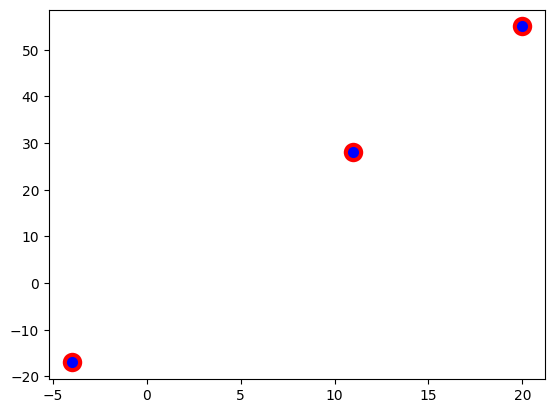

In [ ]:
# Plot the test data and model predictions | رسم نمودار

# linewidths -> اندازه نقطه
plt.scatter(x_test.numpy(), y_test.numpy(), color='red', linewidths=8)
plt.scatter(x_test.numpy(), y_pred, color='blue', linewidths=2)
plt.show()